# Homework 4

## Cassandra Calciano

Instructions: 

1. Replace "yourname" in the filename of this notebook, and "your name here" in this header, with your name. 
2. Complete all questions/problems. **Make sure to run all cells so that your output is visible**. 
3. Run "restart & run all" from the Kernel menu, to make sure that it's all running in order. 
4. Email me your notebook (.ipynb file) to jonathan.reeve@columbia.edu. Please don't email me archives (`.zip` or `.tar.gz`) or extra texts. Write the word "lobster" somewhere in your email, so that I know you read these instructions.

In [114]:
import requests
import nltk
#from nltk.corpus import wordnet as wn
from nltk.corpus import brown
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from collections import Counter
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

### 1. Install SpaCy and the SpaCy language model called `en_core_web_lg`. 

It is important that you get this particular language model, as the others don't have the features we'll need. 

You're welcome to work together in groups for this one (probably in groups where you all run the same operating system). 

There are installation instructions [here on the SpaCy website](https://spacy.io/usage/) that list a number of command-line commands to run. To run command-line commands: 

 - **Linux**: open a terminal. 
 - **MacOS**: open the Terminal app. (Hint: you can open Spotlight, the magnifying glass icon in the upper right, and type "terminal")
 - **Windows**: open Powershell. (Open the Start menu, then type "powershell.") Alternatively, download Git BASH, which is included in GitHub Desktop. 

Whenever you see command-line commands, they're usually prefixed with `$` or `#`. A `$` means to run the command as a regular user, and a `#` means to prefix your command with `sudo`. You'll generally only see `$`, and you're already running as a regular user, so all you'll need to do is to type in the command that follows the `$`, i.e. not including the `$`. So if the command is shown in the SpaCy docs as `$ conda install -c conda-forge spacy`, open a terminal and type `conda install -c conda-forge spacy`, exactly as written. 

When following the SpaCy instructions, you'll want to choose `conda` as your package manager (because you've installed Anaconda), and 'python3' as your Python version, since we're using Python 3 in this course. Don't select `virtualenv` unless you really know what you're doing. 

To show that you've successfully installed this stack, please run the two cells below, to show that it's not giving you errors. 

In [5]:
import spacy

In [6]:
nlp = spacy.load('en_core_web_lg')

### 2. Create the corpus that you'll use for your final project, and put it into a dictionary with labels as the keys. 

Consult [the final project instructions](https://github.com/JonathanReeve/course-computational-literary-analysis/blob/master/Resources/final-project-instructions.md#choosing-a-corpus) on choosing a corpus. Feel free to use [corpus-db.org](http://corpus-db.org) to assemble your corpus. If you need any help in using it, please ask in the chatroom! You can use it to get, say, 30 detective novels relatively easily, or 30 novels that feature young women, or 30 novels set in Paris. You can also get all the works by a certain author this way. But be careful to know exactly what texts you're getting. Project Gutenberg includes texts in a number of languages, so select your texts carefully. 

If you have a directory of text files, you can easily load all the files in your directory with `glob`, using something like:

```python
{filename: open(filename).read() for filename in glob.glob('*.txt')}
```

Stick with English texts, please. NLP in other languages is possible, but requires a different set of tokenizers and other tools that we haven't used yet in this course. It's also good idea to work with texts that are originally written in English, since translations have the problem of introducing translator's word choices to the set of word choices that the author has already made.

Your corpus should be a collection of texts, stored in one variable. However, it doesn't have to be a collection of *works*. Rather, it can be all the narratives in _The Moonstone_, all of Katherine Mansfield's stories, all of Joyce's stories, or some combination of the above, based on theme or genre. It can also be all the novels of a certain writer, or of five writers. Comparisons make for good corpora. Why not compare, say, all of our Joyce stories to all of our Mansfield stories? You'll probably want to have more than four documents, and less than a thousand, for the analyses that follow. 

You can also use certain APIs to get texts like book reviews. Use `requests.get` along with a URL you get from the API's documentation. Maybe you're interested in comparing texts and their reviews? 

Your corpus might change a little by the time you finish your final project, and that's OK, but try not to change it completely, if you can. 

Make sure to clean your corpus of paratext: tables of contents, Project Gutenberg copyright licenses, etc, since these will throw off text statistics. 

Print out just enough of your corpus to show that it's well-structured, i.e., the first 100 characters of each text. Don't do this if you have 1000 texts, though—just print out a preview of it. 

**Please don't print out the entire contents of your corpus, or include any of your text files in your homework.**

Finally, write a paragraph in Markdown where you describe your sources, and how you organized your corpus. 


In [15]:
def removePunctuation(text, toRemove):
    for punct in "!@#$%^&*().,?/\\:;-_—'–'""":
        text = text.replace(punct, ' ')
    return text

In [8]:
response = requests.get("https://www.gutenberg.org/cache/epub/600/pg600.txt")
garnett = response.text
garnett = garnett[1154:244174] # Gets rid of extraneous documentation

In [9]:
coulson = open("NotesFromUnderground_Jesse Coulson.txt", "r").read()
coulson = coulson[17064:257042]

In [10]:
peaver = open("Pevear, Richard.rtf", encoding='utf-8', errors='ignore').read()
peaver = peaver[51726:301487]
remove = ['\\scaps0', '\\fs20', '\\fs24\\par', '\f0\fs24\par', '\i0', '\n', '\\scaps']
for word in remove:
    peaver = peaver.replace(word, ' ')

In [11]:
macAndrew = open("Notes_MacAndrew.txt").read()
macAndrew = macAndrew[174779:410453]
remove = ['\scaps0', '\fs20', '\fs24', '\f0\fs24\par', '\i0', '\n']
for extra in remove:
    macAndrew = macAndrew.replace(extra, ' ')

In [12]:
hogarth = open("Hogarth NotesFromUnderground.rtf").read()
remove = ['\\\n', '~', '\\', "\\\\", "\'97"]
for extra in remove:
    hogarth = hogarth.replace(extra, ' ')

The five texts that make up `notes` is made up of five translations of Dostoevsky's *Notes from the Underground*. I organized my corpus in chronological order where the first text in the dictionary is the oldest translation. The dictionary is structured so that the key is the name of the translator and the values are the full texts of their respective translation as a string. There are 13 total translations and I have gathered 5. If possible, I will add more translations. 

Charles James Hogarth translated *Letters From The Underworld* in 1913. Constance Garnett translated *Notes from the Underground* in 1918, Andrew R. MacAndrew in 1961, Jessie Coulson in 1972, and Richard Peaver and Larissa Volokhonsky in 1994.

In [40]:
notes = {'hogarth': hogarth, 'garnett': garnett, 'macAndrew': macAndrew, 'coulson': coulson, 'peaver': peaver}
notes = {name: text.lower() for name, text in notes.items()}

for key, text in notes.items():
    print(r'\n')
    print(key)
    print(r'\n')
    print(text[:200])

\n
hogarth
\n
letters from the underworld part i   the underworld  
i am ill ; i am full of spleen and repellent. i con-  ceive there to be something wrong with my liver,  for i cannot even think for the aching of 
\n
garnett
\n
notes from the underground[*]
a novel


* the author of the diary and the diary itself are, of course,
imaginary. nevertheless it is clear that such persons as the writer of
these notes not only
\n
macAndrew
\n
notes from underground                                  part o n e                               the mousehole*                                      i  i'm a sick man • • . a mean man. there's nothing
\n
coulson
\n
notes from underground


the author of these notes, and the notes themselves, are both, of course, imaginary. all the same, if we take into consideration the conditions that have shaped our society, p
\n
peaver
\n
underground    i*    i   am a sick man.  ..i am a wicked man. an unattractive man. i think my liver hurts. however, i don't know a 

### 3. Calculate the length, in words, of each text in your corpus. Make a chart that shows how they compare. 

Then, in a markdown cell, write about how these different lengths may affect your analysis, and how you might counteract the effects of different text lengths. 

<AxesSubplot:>

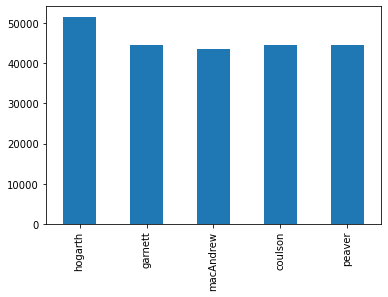

In [103]:
# Insert your code here. 
notes = {name: removePunctuation(text) for name, text in notes.items()}
notesTokens = {name: nltk.word_tokenize(text) for name, text in notes.items()}

for name, tokens in notesTokens.items():
    notesTokens[name] = [token for token in tokens if token.isalpha()]

notesWordCounts = pd.Series({name: len(tokens) for name, tokens in notesTokens.items()})
notesWordCounts.plot(kind='bar')

It is interesting the Hogarth has a noticable amount more words than the other texts. It makes sense that they are all about the same length. MacAndrew deviates a little bit, but not by much. Upon lightly reading Hogarth's translation it is by far the wordiest so this looks consistent with my reading. Garnett's and Peaver's translation are the most commonly read translations and they have a very similar length. 

### 4. Compute the type-token ratio for each text in your corpus. Make a chart that shows how they compare. 

Don't forget to truncate each text to a reasonable value (usually the length of your shortest text).

Then, in a markdown cell, write about what you notice.

In [43]:
def typeTokenRatio(tokens):
    return len(set(tokens)) / len(tokens)

<AxesSubplot:>

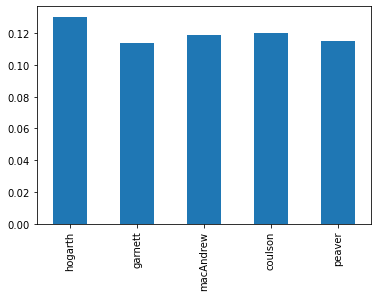

In [44]:
typeTokens = pd.Series({name: typeTokenRatio(tokens[:40000]) for name, tokens in notesTokens.items()})
typeTokens.plot(kind='bar')

It is not only that Hogarth has the wordiest translation, but he also has the largest vocabulary. It is likely that the older vocabulary he uses has a large amount of synonyms for the same word, which would make for a large type token ratio. However, Garnett has an old translation, but a smaller vocabulary. It is as if Garnett's translation is a rebuke of Hogarth's translation. Garnett's translation is also the first to be called *Notes from the Underground*, which the latter texts will go on to be called. 

### 5. Show some frequent n-grams for each text in your corpus.

Don't print out too much—just enough to get the idea. 

Then, in a markdown cell, write about what you notice about them.

In [45]:
def commonNgrams(tokens, n):
    nGrams = list(nltk.ngrams(tokens, n))
    return Counter(nGrams).most_common(20)

In [110]:
for name, tokens in notesTokens.items():
    print(name)
    print(commonNgrams(tokens, 3))

hogarth
[(('letters', 'from', 'the'), 74), (('from', 'the', 'underworld'), 74), (('apropos', 'of', 'the'), 51), (('of', 'the', 'falling'), 51), (('the', 'falling', 'sleet'), 51), (('the', 'fact', 'that'), 28), (('i', 'do', 'not'), 27), (('that', 'i', 'have'), 26), (('that', 'is', 'to'), 26), (('is', 'to', 'say'), 26), (('that', 'i', 'was'), 25), (('a', 'sort', 'of'), 24), (('i', 'could', 'not'), 23), (('that', 'i', 'am'), 22), (('i', 'had', 'been'), 21), (('for', 'the', 'reason'), 20), (('the', 'reason', 'that'), 20), (('i', 'used', 'to'), 19), (('in', 'the', 'world'), 18), (('i', 'have', 'been'), 17)]
garnett
[(('i', 'could', 'not'), 38), (('i', 'did', 'not'), 36), (('i', 'don', 't'), 22), (('that', 'i', 'was'), 22), (('i', 'should', 'have'), 21), (('out', 'of', 'the'), 20), (('that', 'it', 'is'), 20), (('the', 'laws', 'of'), 19), (('i', 'am', 'not'), 18), (('as', 'it', 'were'), 17), (('laws', 'of', 'nature'), 17), (('and', 'so', 'on'), 17), (('that', 'i', 'am'), 15), (('at', 'the', '

The latter four translations all have the same bigram that shows up the most: ('i', 'was'). Whereas the oldest text, Hogarth, has the bigram that shows up the most as ('of', 'the'). I am suprised that ('i', 'am') does not show up as the most common bigram because it is a central part of setting up the narrator as a strong opinionated person in the beginning of the text. However, in Garnett's and MacAndrew's translation it shows up as one of the top 3 bigrams. 

### 6. Choose a word, or an n-gram, which you think may be significant for your corpus. Make a chart that shows the proportions of that term across all the texts in your corpus. 

Make sure to use proportions, and not counts. Then, in the markdown cell, write about what you notice. 

<AxesSubplot:>

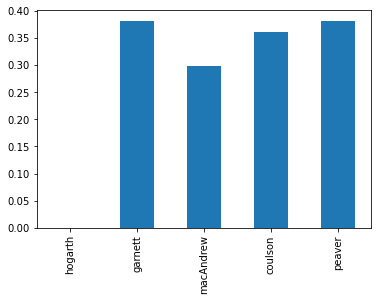

In [111]:
occurance = pd.Series({'hogarth': 0, 'garnett': 17, 'macAndrew': 13, 'coulson': 16, 'peaver': 17})
nGramProp = (occurance/notesWordCounts) * 1000
nGramProp.plot(kind='bar')

I chose the trigram `('laws', 'of', 'nature')` because it occurs in all four of the latter texts. There is likely an equivalent phrase that means the same thing, but is in an older dialect in Hogarth's translation. MacAndrew has the second lowest proportion of the trigram. Right now, it is only Hogarth that is set apart from the rest. Peaver and Garnett are the most similar in their proportion, possibly indicating that their translations are the most similar. Peaver's translations are the most award winning while Garnett's is the second holdest and could have captured the most accurate representation of the time period the text was written in.

### 7. Run a comparative stylometric analysis of the texts in your corpus. 

So, make document-term matrices for your most frequent words, reduce their dimensions to 2 or 3 using PCA, and make a labeled scatter plot and/or dendrogram of the results. 

In [59]:
allTexts = []
for name, text in notes.items():
    allTexts.append(text)
    
allLabels = []
for name, text in notes.items():
    allLabels.append(name)

In [70]:
tfidfVectorizer = TfidfVectorizer(min_df=1, max_features=400)
textMatrix = tfidfVectorizer.fit_transform(allTexts)
denseTextMatrix = textMatrix.todense()

In [71]:
pca = PCA(n_components=2)
textPoints = pca.fit_transform(denseTextMatrix)
textDf = pd.DataFrame(textPoints, index=allLabels, columns=['C1', 'C2'])

/Users/cassandracalciano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


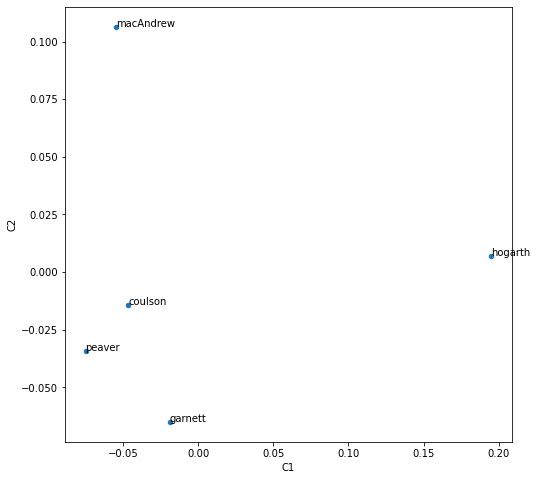

In [73]:
ax = textDf.plot(kind='scatter', x='C1', y='C2', figsize=(8, 8))
for title, points in textDf.iterrows():
    ax.annotate(title, points)

It is not suprising that Hogarth is not clustered with the rest of the texts, but it is suprising that MacAndrew is farther away from the cluster of Garnett, Coulson, and Peaver. Hogarth is the oldest text and even has a different name then the rest, but MacAndrew is a semi-newer text. It is also clear, however, that MacAndrew did not take inspiration from Hogarth because Hogartha and MacAndrew are also far apart. 

### 8. Add the category texts of the Brown Corpus to your stylometric analysis, and create a new visualization which includes these texts.

Then, write about how your texts compare with the texts of the Brown Corpus, and what you think that means. 

In [85]:
# Insert your code here. 
brownTexts = [brown.raw(fileid) for fileid in brown.fileids()]
newTexts = allTexts + brownTexts
newLabels = allLabels + brown.fileids()

In [86]:
tfidfVectorizer = TfidfVectorizer(min_df=1, max_features=400)
textMatrix = tfidfVectorizer.fit_transform(newTexts)
denseTextMatrix = textMatrix.todense()

In [87]:
pca = PCA(n_components=2)
newPoints = pca.fit_transform(denseTextMatrix)
newDf = pd.DataFrame(newPoints, index=newLabels, columns=['C1', 'C2'])

/Users/cassandracalciano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


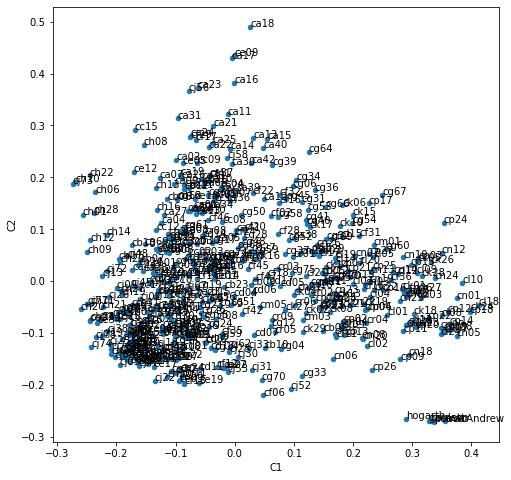

In [88]:
ax = newDf.plot(kind='scatter', x='C1', y='C2', figsize=(8, 8))
for title, points in newDf.iterrows():
    ax.annotate(title, points)

Once all the Brown texts were added, all translations were shown to be relatively similar. All texts now appear to be in the bottom right corner of the scatter plot. It is hard to tell if all translations are gathered there, but it appears that most are. 

### 9. Repeat your analysis from #7, only this time, use semantic words rather than syntactic words. 

In other words, instead of choosing the top 800 most frequent words, or whatever that number is for your texts, choose all the *other* words, which will be the content words. You may want to limit your selection to words that are in all documents, e.g., by setting `min_df` to `1.0` in `TfIdfVectorizer`. 

You'll want to look through the word frequency lists for your corpus to determine where semantic words start in your ranked list of words (after the thousandth most frequent word, maybe?). 

Write about what you found. 

#### Getting rid of the 400 most frequent words

In [166]:
def counted(textString):
    textString = textString.lower()
    textString = textString.replace('-', ' - ')
    textString = textString.replace('*', ' ')
    textTok = nltk.word_tokenize(textString)
    #stems = [stemmer.stem(token) for token in textTok]
    counted = Counter(textTok)
    return counted

In [171]:
allCounts = {name: counted(text) for name, text in notes.items()}
textDf = pd.DataFrame(allCounts).fillna(0)

In [188]:
freqDf = textDf/notesWordCounts
freqDf['average'] = (freqDf['hogarth'] + freqDf['garnett'] + freqDf['macAndrew'] + freqDf['coulson'] + freqDf['peaver'])
leastFreq = freqDf.sort_values(by='average', ascending=False)[-10923:] #this takes off the top 400 words
texts = leastFreq.index

In [192]:
# Insert your code here. 
tfidfVectorizer = TfidfVectorizer(min_df=1.0, stop_words='english')
textMatrix = tfidfVectorizer.fit_transform(allTexts)
denseTextMatrix = textMatrix.todense()

In [194]:
pca = PCA(n_components=2)
textPoints = pca.fit_transform(denseTextMatrix)
textDf = pd.DataFrame(textPoints, index=allLabels, columns=['C1', 'C2'])

/Users/cassandracalciano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


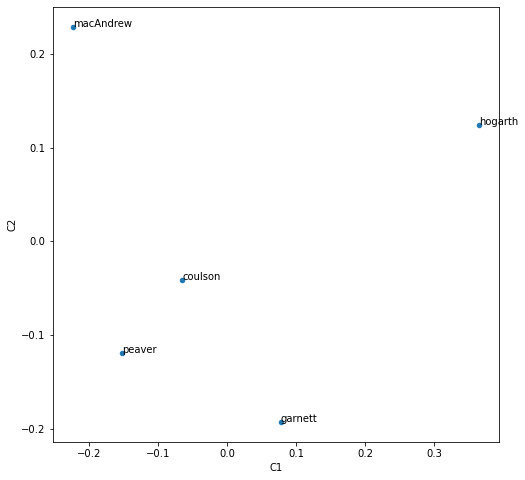

In [195]:
ax = textDf.plot(kind='scatter', x='C1', y='C2', figsize=(8, 8))
for title, points in textDf.iterrows():
    ax.annotate(title, points)

There is now a larger gap between Peaver, Garnett, and Coulson. MacAndrew is further to the left and Hogarth is further to the right, creating a larger gap between them as well. This shows that Coulson and Peaver are the most similar to each other, even though the number of words and the type-token-ratio show that Garnett and peaver are the most similar to each other. I need to read the MacAndrew part of the to see why it is so different from the rest. It is clear as to why Hogarth is so different. It would be worth looking at the native langauge of the translators, British English, American English, or some other language, to see if that is why MacAndrew is different from all the rest. 

### 10. Topic-model your corpus using LDA, and create a chart which shows some topics. 

Experiment with different parameters until you find the ones that give you the most interpretable results. 

In [235]:
countVectorizer = CountVectorizer(stop_words='english', min_df=1, max_df=0.5, max_features=200)
notesCounts = countVectorizer.fit_transform(allTexts)

In [236]:
wordLabels = countVectorizer.get_feature_names_out()

In [248]:
lda = LatentDirichletAllocation(n_components=3)
ldaOut = lda.fit_transform(notesCounts)

In [249]:
def getWords(topicNames):
    return ' '.join(list(topicWordMatrix.loc[topicNames].sort_values(ascending=False).head(5).index))

In [250]:
topicWordMatrix = pd.DataFrame(lda.components_, index=['Topic ' + str(x) for x in range(3)], columns=wordLabels)
topicWordMatrix.loc['Topic 0'].sort_values(ascending=False).head(15)

ferfitchkin     28.338204
enjoyment       20.369373
sublime         17.338514
continually     17.337380
antonitch        9.334972
opposition       8.333327
contemptible     7.335715
torturer         6.342489
advantages       6.334914
faint            6.334656
realise          6.334656
degrees          5.342061
heavens          5.334542
propos           5.334542
civilisation     5.334095
Name: Topic 0, dtype: float64

In [241]:
topicLabelsWords = [getWords(topic) for topic in ['Topic 0', 'Topic 1', 'Topic 2']]

<AxesSubplot:>

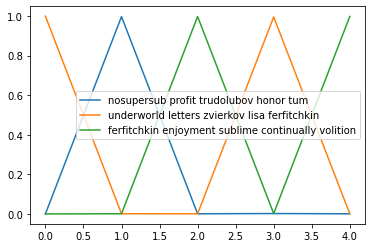

In [251]:
pd.DataFrame(ldaOut, columns=topicLabelsWords).plot()

In [220]:
topicWordMatrix.loc['Topic 1'].sort_values(ascending=False).head(15)

underworld     106.349634
letters         78.333325
zvierkov        51.333325
lisa            45.333325
ferfitchkin     25.333496
trudoliubov     23.333325
morrow          18.333325
volition        17.334251
sensibility     13.333325
wherefore       11.333325
lastly          11.333325
folly           10.334552
adversity        9.333325
cabman           8.334441
seek             8.334259
Name: Topic 1, dtype: float64

In [221]:
topicWordMatrix.loc['Topic 2'].sort_values(ascending=False).head(15)

underworld     106.201025
letters         78.200000
zvierkov        51.200000
lisa            45.200000
ferfitchkin     25.199674
trudoliubov     23.200000
morrow          18.200000
volition        17.199701
sensibility     13.200000
wherefore       11.200000
lastly          11.200000
folly           10.200050
adversity        9.200000
cabman           8.200061
seek             8.200033
Name: Topic 2, dtype: float64

It is hard to differentiate topics here because they are all the same text, just different translations. The first topic has the word 'profit' and 'honor', which seem to be very dramatic. Whereas the last topic has a less dramatic tone with words like 'enjoyment' and 'sublime'. The second topic is most influenced by Hogarth, because of the word 'Hogarth'. 

### Bonus: Make a simple genre categorizer that tries to guess the genre of a text, based on word frequencies derived from the Brown corpus. Test it on all of Mansfield's stories that we've read. 

Then, write about why you think your categorizer guessed those genres for these stories. 

In [ ]:
# Insert your code here. 

Insert your markdown here. 